## Cohort Tracking with ehrapy
Important for many reasons

In [1]:
import ehrapy as ep
from tableone import TableOne

/Users/eljasroellin/Documents/ehrapy_clean/ehrapy_venv_march_II/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Tableone
nice package

In [2]:
adata = ep.dt.diabetes_130(columns_obs_only=["gender", "race", "time_in_hospital_days"])
TableOne(adata.obs)

2024-03-13 11:17:19,282 - root INFO - Transformed passed DataFrame into an AnnData object with n_obs x n_vars = `101766` x `48`.


Missing       Overall
n                                                           101766
gender, n (%)                0.0                   3  54708 (53.8)
                             1.0                      47055 (46.2)
race, n (%)                  AfricanAmerican    2273  19210 (19.3)
                             Asian                       641 (0.6)
                             Caucasian                76099 (76.5)
                             Hispanic                   2037 (2.0)
                             Other                      1506 (1.5)
time_in_hospital_days, n (%) 1                     0  14208 (14.0)
                             10                         2342 (2.3)
                             11                         1855 (1.8)
                             12                         1448 (1.4)
                             13                         1210 (1.2)
                             14                         1042 (1.0)
                             2                        17224 (16.9)
                             3                        17756 (17.4)
                             4                        13924 (13.7)
                             5                          9966 (9.8)
                             6                          7539 (7.4)
                             7                          5859 (5.8)
                             8                          4391 (4.3)
                             9                          3002 (2.9)

### CohortTracker
A visualization aid automated in ehrapy: summarizing tableone information graphically.
Especially useful for cohort processing, as the overview component becomes even more important there

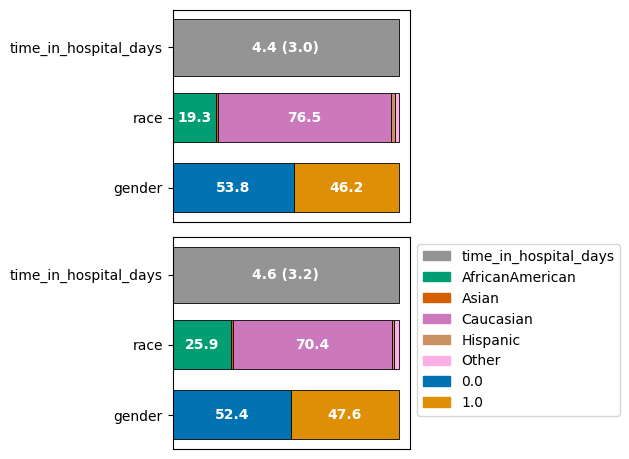

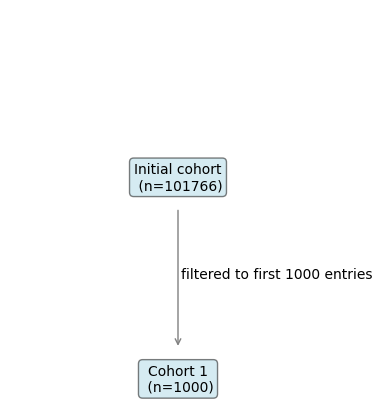

In [3]:
# instantiate the cohort tracker
pop_track = ep.tl.CohortTracker(adata, categorical=["gender", "race"])

# track the initial state of the dataset
pop_track(adata, label="Initial cohort")

# do a filtering step
adata = adata[:1000]

# track the filtered dataset
pop_track(adata, label="Cohort 1", operations_done="filtered to first 1000 entries")

# plot the change of the cohort
pop_track.plot_cohort_barplot()

# plot a flowchart
pop_track.plot_flowchart()

Some nice plotting options are available

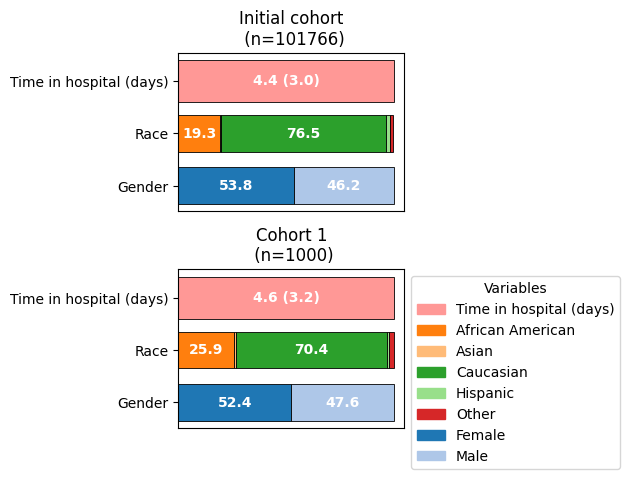

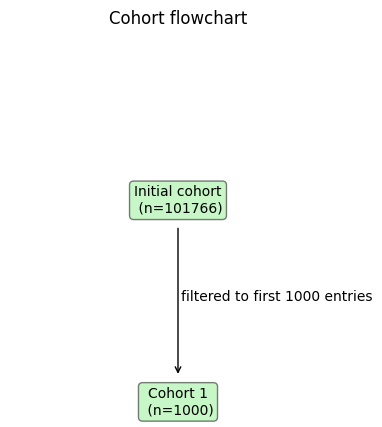

In [11]:
pop_track.plot_cohort_barplot(
    subfigure_title=True,
    yticks_labels={"time_in_hospital_days": "Time in hospital (days)", "race": "Race", "gender": "Gender"},
    color_palette="tab20",
    legend_labels={
        "time_in_hospital_days": "Time in hospital (days)",
        "AfricanAmerican": "African American",
        0.0: "Female",
        1.0: "Male",
    },
    legend_kwargs={"title": "Variables", "bbox_to_anchor": (1, 1)},
)

pop_track.plot_flowchart(
    title="Cohort flowchart", arrow_size=0.75, bbox_kwargs={"fc": "lightgreen"}, arrowprops_kwargs={"color": "black"}
)